# Plan of Attack
The crop yield depends on many factors (geography, soil type, fertiliser use, adoption of new modern high-yielding variety (MV) rice etc.), weather just being one. These other factors though are likely to be systematic (i.e. Evolve slowly over time) and contribute to the general trend in crop yield. i.e. Any fluctuations above or below trend are likely down to weather. Here we test this hypothesis.

We thus need to:

1. Obtain the fluctuations about the average yield
2. Obtain the fluctuations of the weather 

We will do this by using moving averages. We will therefore replace the absolute average yield and absolute temperature values with fluctuation values (We might use z-scores = (value - rolling mean)/std dev ).

If weather plays a role in rice yields, one would expect to see a clear correlation between yield and weather fluctations. Maybe we find that extreme high or low temperatures/rainfall contribute to a poor harvest. 

How to analyse this potential correlation? 

1. Build a model: yield deviation = T1 + T2 + ... T12 + R1 + R2 + ... + R12 (Or a classificayion model where we replace yield deviation with +1 (Good harvest) and -1 (Bad harvest))

2. Perform clustering: For a particular year, cluster the countries on their weather data and calculate the average yield deviation in each group. Is there a significant difference in the values?



In [28]:
# Read in primary data file
df1 = read.csv("./Data/Final_crop_data.csv",header=T)

# Delete unnecessary columns
df1$X <- NULL
df1$SEQ_NO <- NULL

# Rename column
names(df1)[3] <- "COUNTRY"

# Read in file with ISO country codes
df_iso = read.csv("./Data/wikipedia-iso-country-codes.csv",header=T)
names(df_iso)[1] <- 'Name'

# Merge two files
df = merge(df1, df_iso, by.x='ISO', by.y='Alpha.3.code')

# Delete redundant columns
df$Alpha.2.code = NULL
df$Numeric.code = NULL
df$ISO.3166.2 = NULL

# Assign values to COUNTRY column
df$COUNTRY = df$Name
df$Name = NULL

# Simplify some of the country names
df$COUNTRY

# Remove redundant levels
df=droplevels(df)


In [4]:
head(df)

ISO,YEAR,COUNTRY,LAND_AREA,HARV_AREA,FERT,YIELD,AVG_TEMP_JAN,AVG_TEMP_FEB,AVG_TEMP_MAR,⋯,AVG_RF_NOV,AVG_RF_DEC,AVG_Q1_TEMP,AVG_Q2_TEMP,AVG_Q3_TEMP,AVG_Q4_TEMP,AVG_Q4_RF,AVG_Q3_RF,AVG_Q2_RF,AVG_Q1_RF
AFG,1991,Afghanistan,65286,173000,6.140000,1.94,-0.03110,1.43654,6.88685,⋯,12.66710,38.55690,2.764097,17.69763,22.97277,8.143453,18.43989,7.230680,38.21139,81.26800
AFG,1992,Afghanistan,65286,175000,5.790000,1.71,0.74637,2.46018,5.71341,⋯,9.92092,47.46040,2.973320,16.89697,21.80963,8.498270,24.41974,7.827567,44.34204,59.46273
AFG,1993,Afghanistan,65286,175000,5.110000,1.71,-0.08350,4.33465,6.12034,⋯,21.58090,20.68180,3.457163,18.33557,22.52880,7.587023,16.62800,5.226967,29.86003,53.98010
AFG,1994,Afghanistan,65286,180000,5.820435,1.90,1.11415,1.14112,8.97734,⋯,12.81990,36.94000,3.744203,18.18197,22.22033,8.173570,23.60247,11.033253,23.07017,56.36823
AFG,1995,Afghanistan,65286,170000,5.820435,2.29,0.92358,2.96133,6.36893,⋯,6.24458,35.71700,3.417947,17.96013,23.05943,7.726067,18.51706,7.733073,31.69475,42.35450
AFG,1996,Afghanistan,65286,175000,0.650000,1.94,-0.48840,2.86922,7.29518,⋯,9.68384,6.71934,3.225333,17.79007,22.77710,7.208570,10.37393,5.784513,27.51930,63.32300


In [548]:
head(df)


ISO,YEAR,COUNTRY,LAND_AREA,HARV_AREA,FERT,YIELD,AVG_TEMP_JAN,AVG_TEMP_FEB,AVG_TEMP_MAR,⋯,AVG_RF_NOV,AVG_RF_DEC,AVG_Q1_TEMP,AVG_Q2_TEMP,AVG_Q3_TEMP,AVG_Q4_TEMP,AVG_Q4_RF,AVG_Q3_RF,AVG_Q2_RF,AVG_Q1_RF
AFG,1991,Afghanistan,65286,173000,6.140000,1.94,-0.03110,1.43654,6.88685,⋯,12.66710,38.55690,2.764097,17.69763,22.97277,8.143453,18.43989,7.230680,38.21139,81.26800
AFG,1992,Afghanistan,65286,175000,5.790000,1.71,0.74637,2.46018,5.71341,⋯,9.92092,47.46040,2.973320,16.89697,21.80963,8.498270,24.41974,7.827567,44.34204,59.46273
AFG,1993,Afghanistan,65286,175000,5.110000,1.71,-0.08350,4.33465,6.12034,⋯,21.58090,20.68180,3.457163,18.33557,22.52880,7.587023,16.62800,5.226967,29.86003,53.98010
AFG,1994,Afghanistan,65286,180000,5.820435,1.90,1.11415,1.14112,8.97734,⋯,12.81990,36.94000,3.744203,18.18197,22.22033,8.173570,23.60247,11.033253,23.07017,56.36823
AFG,1995,Afghanistan,65286,170000,5.820435,2.29,0.92358,2.96133,6.36893,⋯,6.24458,35.71700,3.417947,17.96013,23.05943,7.726067,18.51706,7.733073,31.69475,42.35450
AFG,1996,Afghanistan,65286,175000,0.650000,1.94,-0.48840,2.86922,7.29518,⋯,9.68384,6.71934,3.225333,17.79007,22.77710,7.208570,10.37393,5.784513,27.51930,63.32300


In [402]:
# We have annual data from 1991-2015 (inclusive) for 105 countries (with no null/na values)
unique(df$COUNTRY)
cat(paste('Number of countries = ',length(unique(df$COUNTRY))))
unique(df$YEAR)
cat(paste('Number of null values = ',sum(colSums(is.na(df)))))

[1] Afghanistan                               
  [2] Angola                                    
  [3] Argentina                                 
  [4] Australia                                 
  [5] Azerbaijan                                
  [6] Burundi                                   
  [7] Benin                                     
  [8] Burkina Faso                              
  [9] Bangladesh                                
 [10] Bulgaria                                  
 [11] Belize                                    
 [12] Bolivia, Plurinational State of           
 [13] Brazil                                    
 [14] Brunei Darussalam                         
 [15] Bhutan                                    
 [16] Central African Republic                  
 [17] Chile                                     
 [18] China                                     
 [19] Côte d'Ivoire                             
 [20] Cameroon                                  
 [21] Congo                                     
 [22] Colombia                                  
 [23] Comoros                                   
 [24] Costa Rica                                
 [25] Cuba                                      
 [26] Dominican Republic                        
 [27] Algeria                                   
 [28] Ecuador                                   
 [29] Egypt                                     
 [30] Spain                                     
 [31] Ethiopia                                  
 [32] Fiji                                      
 [33] France                                    
 [34] Gabon                                     
 [35] Ghana                                     
 [36] Guinea                                    
 [37] Guinea-Bissau                             
 [38] Greece                                    
 [39] Guatemala                                 
 [40] Guyana                                    
 [41] Honduras                                  
 [42] Haiti                                     
 [43] Hungary                                   
 [44] Indonesia                                 
 [45] India                                     
 [46] Iran, Islamic Republic of                 
 [47] Iraq                                      
 [48] Italy                                     
 [49] Jamaica                                   
 [50] Japan                                     
 [51] Kazakhstan                                
 [52] Kenya                                     
 [53] Kyrgyzstan                                
 [54] Cambodia                                  
 [55] Korea, Republic of                        
 [56] Lao People's Democratic Republic          
 [57] Sri Lanka                                 
 [58] Madagascar                                
 [59] Mexico                                    
 [60] Macedonia, the former Yugoslav Republic of
 [61] Mali                                      
 [62] Myanmar                                   
 [63] Mozambique                                
 [64] Mauritania                                
 [65] Mauritius                                 
 [66] Malawi                                    
 [67] Malaysia                                  
 [68] Niger                                     
 [69] Nigeria                                   
 [70] Nicaragua                                 
 [71] Nepal                                     
 [72] Pakistan                                  
 [73] Panama                                    
 [74] Peru                                      
 [75] Philippines                               
 [76] Papua New Guinea                          
 [77] Portugal                                  
 [78] Paraguay                                  
 [79] Romania                                   
 [80] Russian Federation                        
 [81] Rwanda                                    
 [82] Sudan                      

Number of countries =  105

[1] 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
[16] 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015

Number of null values =  0

# Check for outliers

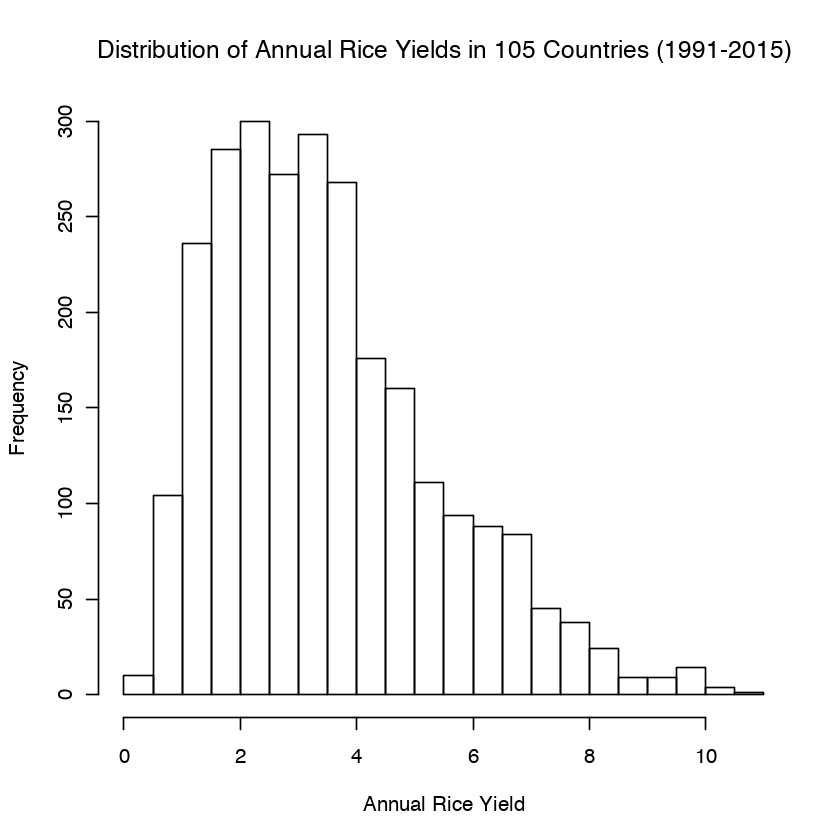

In [414]:
# Yield
hist(df$YIELD,breaks=30,xlab='Annual Rice Yield',ylab='Frequency',main='Distribution of Annual Rice Yields in 105 Countries (1991-2015)')


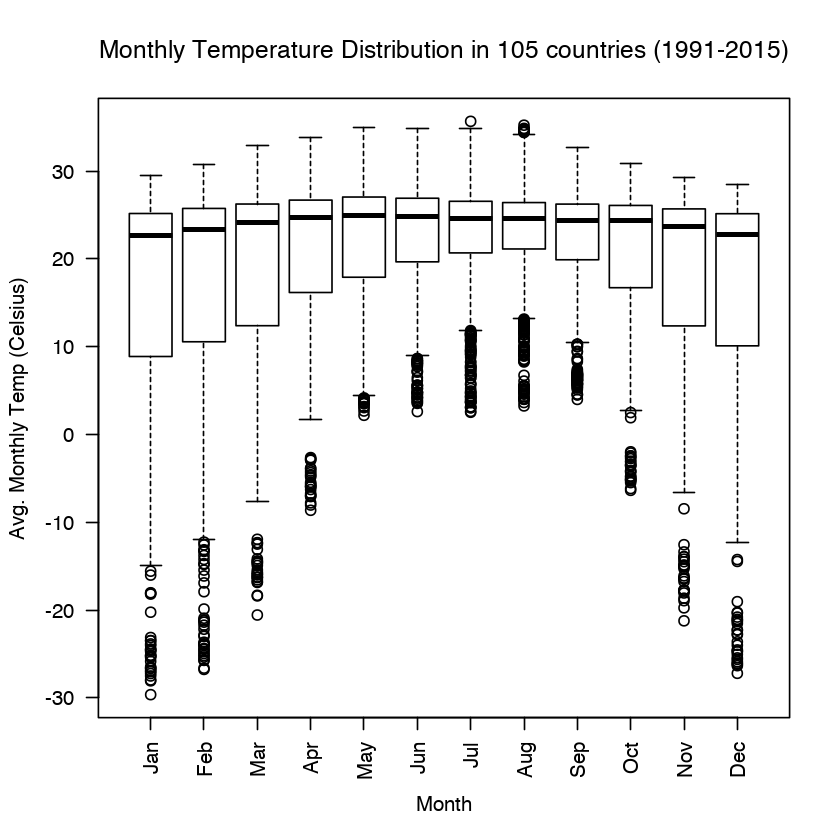

In [415]:
# Distribution of monthly temperature values
monthlyLabels = c('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
boxplot(df[,8:19],las=2,xlab='Month',ylab='Avg. Monthly Temp (Celsius)',main='Monthly Temperature Distribution in 105 countries (1991-2015)',names=monthlyLabels)


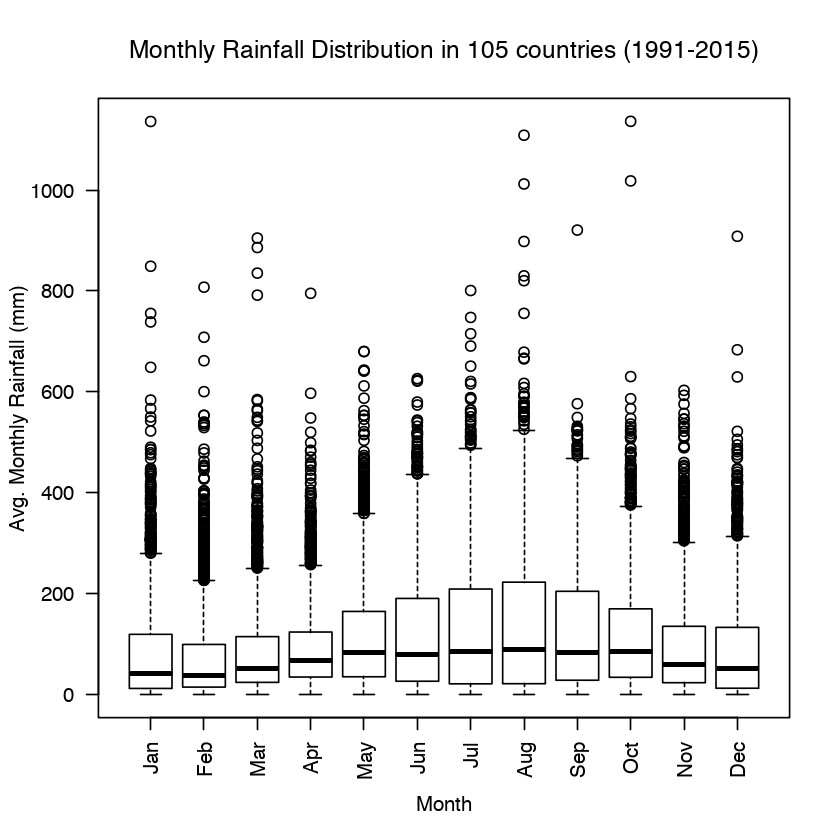

In [416]:
# Distribution of monthly Precipitation 
monthlyLabels = c('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
boxplot(df[,20:31],las=2,xlab='Month',ylab='Avg. Monthly Rainfall (mm)',main='Monthly Rainfall Distribution in 105 countries (1991-2015)',names=monthlyLabels)


# Rolling Averages

Below I define the function get_sma_for_column() that can be used to calculate a rolling average (per country) for any column in dataframe

In [419]:
# Calculate moving average in rice yield time series
sma <- function(x, n = 5){filter(x, rep(1/n, n), sides = 2)}

get_sma_for_column <- function(df,newColName,colName,n){
 # Takes in a dataframe, adds a new column called <newColName> and calculates a simple moving average   
 # on the column <colName> for each country. Note that n = Number of values in moving window 
    
 ' Add new column '
 df[newColName] = NA
 
 for (country in unique(df$COUNTRY))
  {
   df_country = subset(df,COUNTRY==country)
   df[,newColName][df$COUNTRY==country] = sma(df_country[colName],n)
  }
 
 return(df)
}

In [420]:
df = get_sma_for_column(df,'YIELD_SMA','YIELD',5)

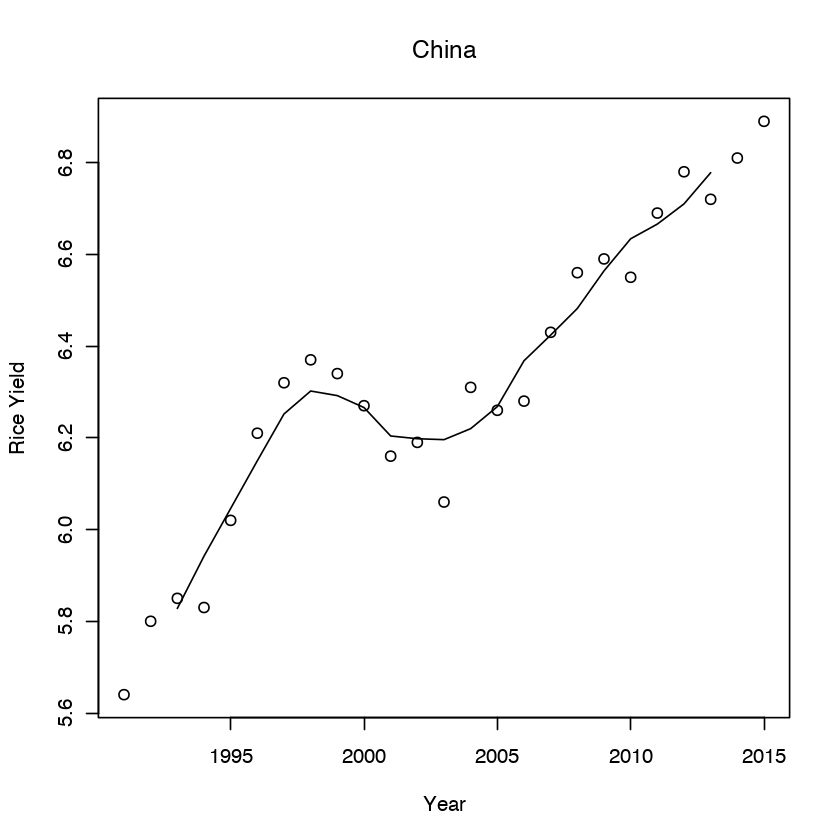

In [421]:
country = 'China'
df_country = subset(df,COUNTRY==country)
plot(df_country$YEAR,df_country$YIELD,xlab='Year',ylab='Rice Yield',main=country)
lines(df_country$YEAR,df_country$YIELD_SMA)

# Clustering Climate Groups

Here we attempt to group countries with similar climates i.e. Identify groups having similar monthly/seasonal weather patterns. Why? It might be useful to build different models for each grouping i.e. Lead to better prediction

We first get monthly averages for each country and then cluster on these aggregate values.

Note that I am following the cluster tools used in 
https://www.datanovia.com/en/lessons/data-preparation-and-r-packages-for-cluster-analysis/


In [427]:
# Obtain monthly averages for each country
df_avg_weather_by_country = aggregate(df[,8:31], by=list(df$COUNTRY), FUN=mean)
rownames(df_avg_weather_by_country) <- df_avg_weather_by_country$Group.1
df_avg_weather_by_country$Group.1 = NULL

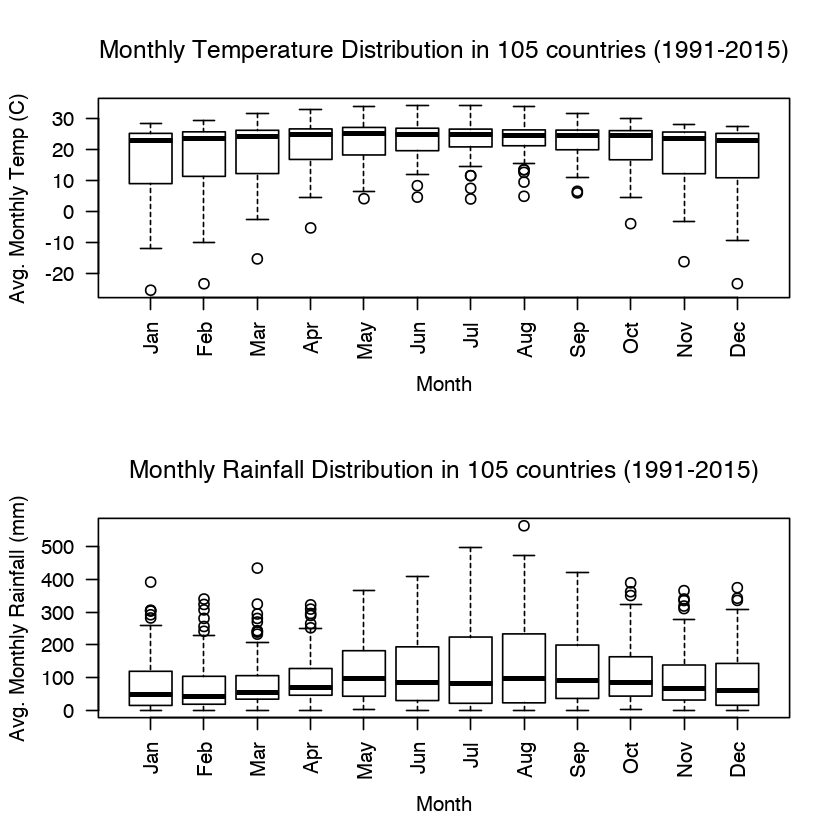

In [429]:
par(mfrow=c(2,1))
monthlyLabels = c('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
boxplot(df_avg_weather_by_country[,1:12],las=2,xlab='Month',ylab='Avg. Monthly Temp (C)',main='Monthly Temperature Distribution in 105 countries (1991-2015)',names=monthlyLabels)
boxplot(df_avg_weather_by_country[,13:24],las=2,xlab='Month',ylab='Avg. Monthly Rainfall (mm)',main='Monthly Rainfall Distribution in 105 countries (1991-2015)',names=monthlyLabels)


# Do NOT standardise the weather data!

Here I cluster on temperature and rainfall separately. Because the weather data is all on the same scale (e.g. Celsius), there is NO NEED to standardise the data before clustering! The results seem intuitive.

In [430]:
#install.packages(c("cluster", "factoextra"))
library(cluster)
library(factoextra)

# Temperature

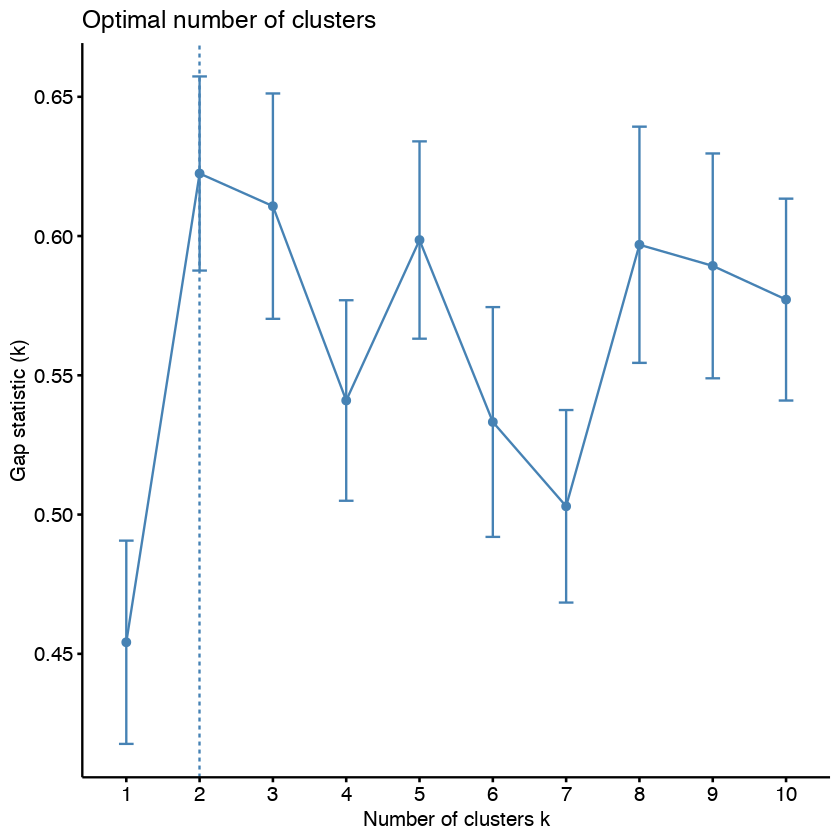

In [431]:
# Standardise data - NOT!
df_avg_temps_by_country <- df_avg_weather_by_country[,1:12]

# Determining the optimal number of clusters for kMeans - Return result of 2  
fviz_nbclust(df_avg_temps_by_country, kmeans, method = "gap_stat")


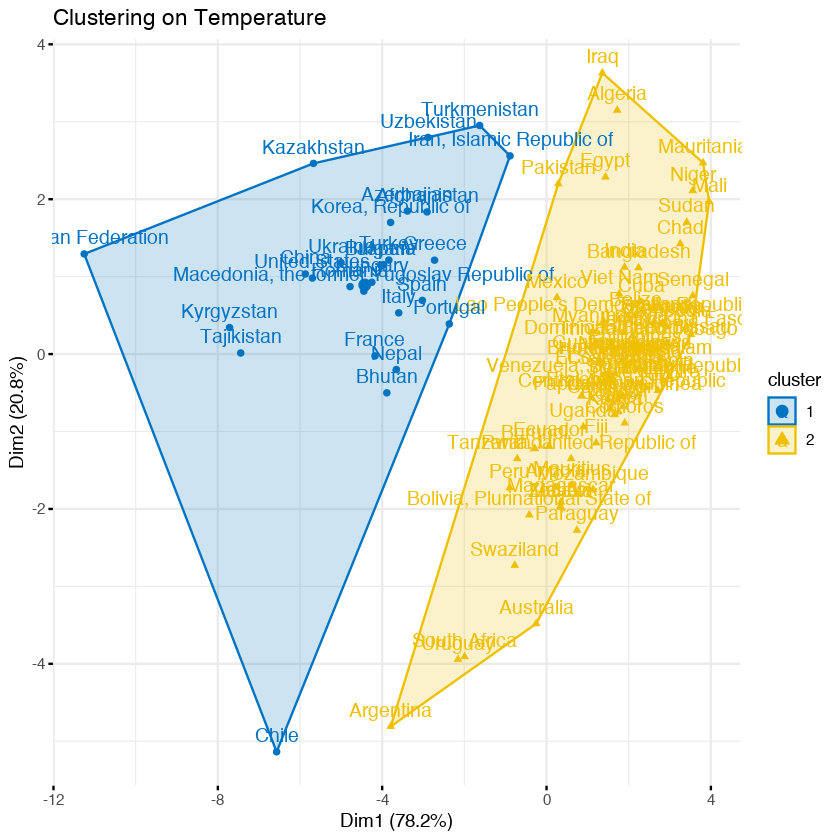

In [432]:
set.seed(123)
km.res <- kmeans(df_avg_temps_by_country, 2, nstart = 25)

# Visualize
fviz_cluster(km.res, data = df_avg_temps_by_country, palette = "jco", ggtheme = theme_minimal(),main="Clustering on Temperature")


In [434]:
# We can see that cluster 1 corresponds to countries with very cold winters! 
# whereas countries in cluster 2 have relatively constant temperatures all year round 
km.res$centers

,AVG_TEMP_JAN,AVG_TEMP_FEB,AVG_TEMP_MAR,AVG_TEMP_APR,AVG_TEMP_MAY,AVG_TEMP_JUN,AVG_TEMP_JUL,AVG_TEMP_AUG,AVG_TEMP_SEP,AVG_TEMP_OCT,AVG_TEMP_NOV,AVG_TEMP_DEC
1,-0.9139926,0.5358739,5.024352,10.34044,15.06090,19.14154,21.35687,20.93695,16.77355,11.37797,5.346329,0.6298041
2,23.1036175,24.0192731,25.053218,25.63015,25.50423,24.93585,24.43408,24.60031,24.96212,24.99278,24.172229,23.2660561


# Rainfall

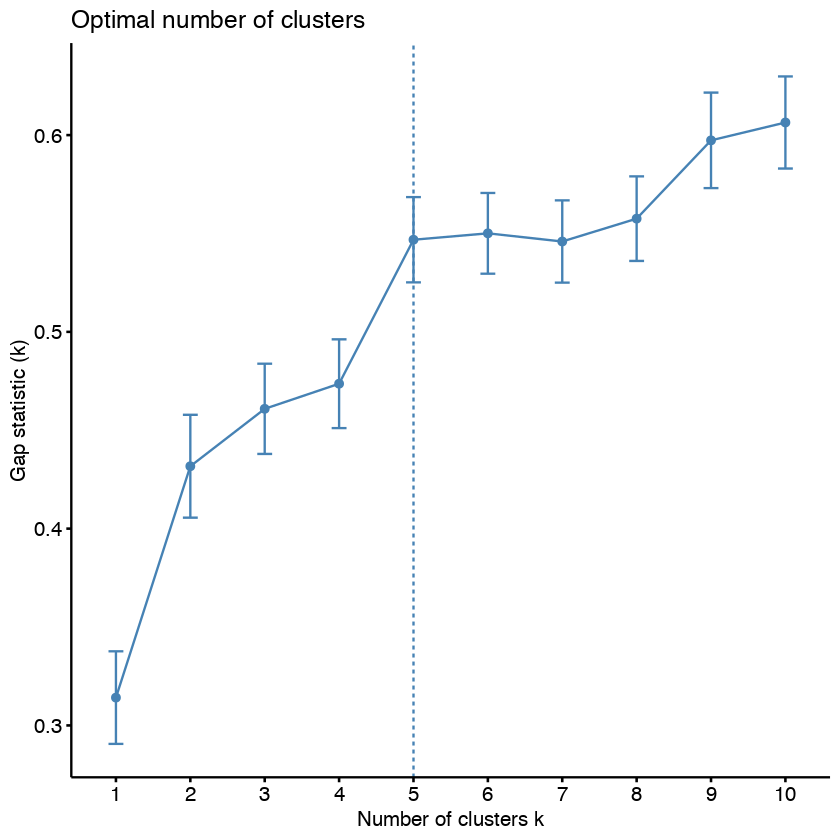

In [436]:
# Standardise data - NOT
df_avg_rainfalls_by_country <- df_avg_weather_by_country[,13:24]

# Determining the optimal number of clusters for kMeans - Returns result of 5 
fviz_nbclust(df_avg_rainfalls_by_country, kmeans, method = "gap_stat")


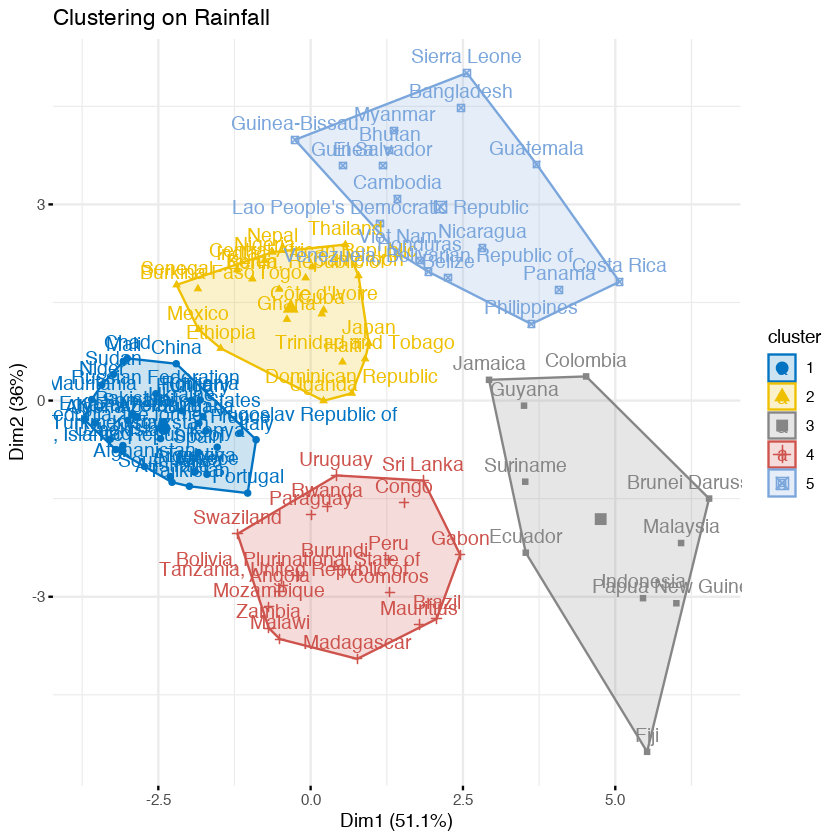

In [437]:
set.seed(123)
km.res <- kmeans(df_avg_rainfalls_by_country, 5, nstart = 25)

# Visualize
fviz_cluster(km.res, data = df_avg_rainfalls_by_country, palette = "jco", ggtheme = theme_minimal(),main="Clustering on Rainfall")


In [438]:
km.res$centers

,AVG_RF_JAN,AVG_RF_FEB,AVG_RF_MAR,AVG_RF_APR,AVG_RF_MAY,AVG_RF_JUN,AVG_RF_JUL,AVG_RF_AUG,AVG_RF_SEP,AVG_RF_OCT,AVG_RF_NOV,AVG_RF_DEC
1,36.09365,34.18831,37.24999,39.15727,40.64419,36.09048,36.99857,38.1768,33.57962,38.06907,38.92556,38.88848
2,25.45753,27.94582,48.78282,82.33662,123.05780,146.71488,180.68599,196.8030,179.30427,123.92047,59.27558,32.77158
3,235.20043,214.43647,246.64240,256.29418,283.77827,220.17059,207.67869,188.4369,169.10708,203.72349,220.65175,246.26929
4,180.33258,166.91982,167.73392,123.96985,82.71171,47.91410,37.68297,39.0977,61.43760,103.20611,136.90127,163.70256
5,51.05096,35.94174,45.63892,86.57496,204.60636,283.72118,321.15904,343.4815,298.66625,242.82519,133.65028,75.21504


# Temperature and Rainfall
We want to put temperature and rainfall values on the same scale. So I calculated

1. The median (med) and interquartile range (IQR) of all the temperature values
2. The median and interquartile range of all the rainfall values

I then rescaled the temperature and rainfall values separately using the transformation (x_i-med)/IQR

Clustering was then run on these rescaled temperature and rainfall values

In [439]:
# Calculate median and Inter-quartile ranges 
median_temp = median(as.matrix(df_avg_temps_by_country))
median_rainfall = median(as.matrix(df_avg_rainfalls_by_country))

iqr_temp = IQR(as.matrix(df_avg_temps_by_country))
iqr_rainfall = IQR(as.matrix(df_avg_rainfalls_by_country))

# Rescale weather data
df_avg_weather_by_country.rescaled = df_avg_weather_by_country 
df_avg_weather_by_country.rescaled[,1:12] = (df_avg_weather_by_country.rescaled[,1:12] - median_temp)/iqr_temp
df_avg_weather_by_country.rescaled[,13:24] = (df_avg_weather_by_country.rescaled[,13:24] - median_rainfall)/iqr_rainfall


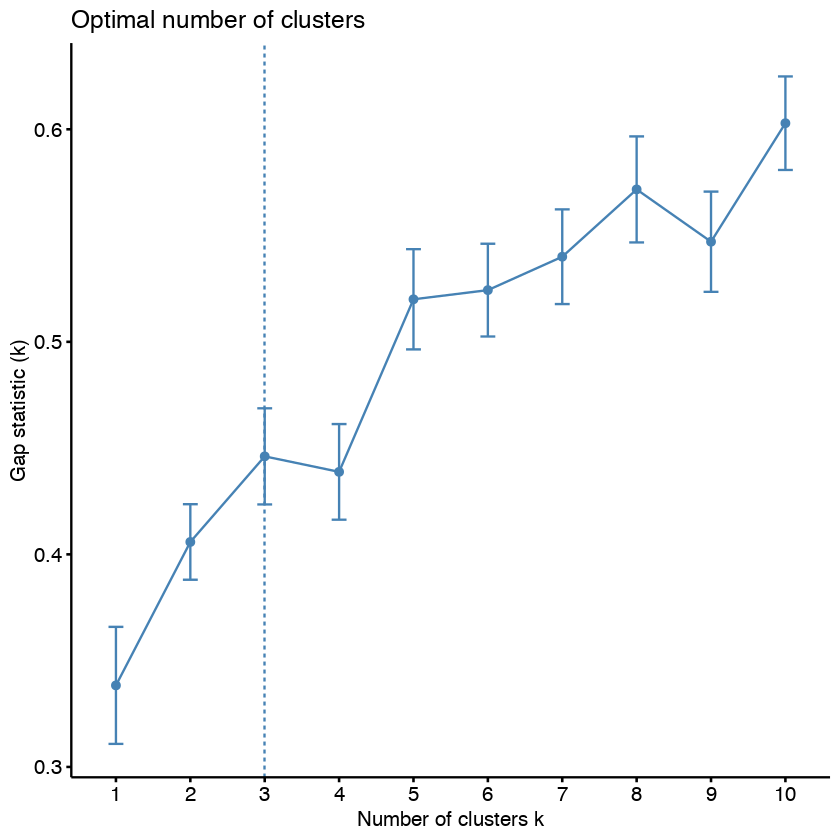

In [441]:
# Determining the optimal number of clusters for kMeans - Returns result of 3  
fviz_nbclust(df_avg_weather_by_country.rescaled, kmeans, method = "gap_stat")

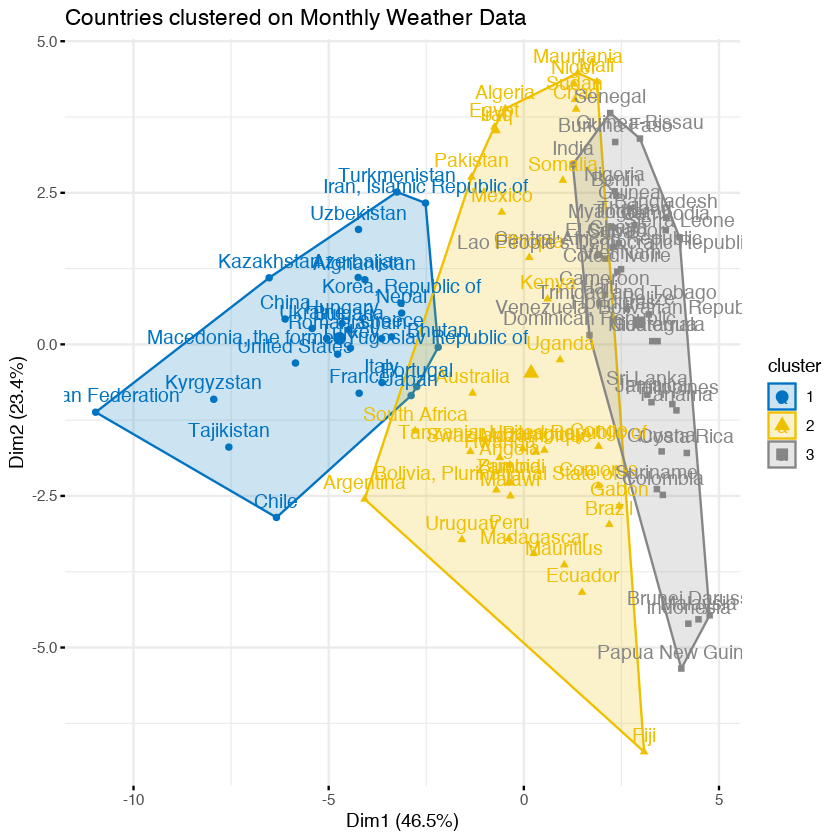

In [442]:
set.seed(123)
km.res <- kmeans(df_avg_weather_by_country.rescaled, 3, nstart = 25)

# Visualize
fviz_cluster(km.res, data = df_avg_weather_by_country.rescaled, palette = "jco", ggtheme = theme_minimal(),main="Countries clustered on Monthly Weather Data")


In [443]:
# Let us look at the centers of each cluster 
# Note that I have transformed the coordinates back to the original scale (Celsius and millimetres) 
# for ease of interpretation
cluster_centres = km.res$centers
cluster_centres[,1:12] = median_temp + (iqr_temp*cluster_centres[,1:12])
cluster_centres[,13:24] = median_rainfall + (iqr_rainfall*cluster_centres[,13:24])
cluster_centres

,AVG_TEMP_JAN,AVG_TEMP_FEB,AVG_TEMP_MAR,AVG_TEMP_APR,AVG_TEMP_MAY,AVG_TEMP_JUN,AVG_TEMP_JUL,AVG_TEMP_AUG,AVG_TEMP_SEP,AVG_TEMP_OCT,⋯,AVG_RF_MAR,AVG_RF_APR,AVG_RF_MAY,AVG_RF_JUN,AVG_RF_JUL,AVG_RF_AUG,AVG_RF_SEP,AVG_RF_OCT,AVG_RF_NOV,AVG_RF_DEC
1,-0.9139926,0.5358739,5.024352,10.34044,15.06090,19.14154,21.35687,20.93695,16.77355,11.37797,⋯,47.08572,55.26622,65.30166,73.90451,81.90675,71.98635,62.22901,52.70039,47.36561,46.13487
2,22.0704502,22.7675632,23.530497,23.85335,23.66198,23.05258,22.60924,23.11586,23.78542,23.88947,⋯,116.27366,92.40203,67.47556,45.38880,47.17030,49.98709,52.97540,70.15781,85.45955,102.15956
3,24.0359879,25.1488650,26.427381,27.23361,27.16674,26.63539,26.08088,25.93994,26.02402,25.98844,⋯,80.58824,115.69618,193.18361,218.55141,238.54135,257.61324,234.19366,203.93025,133.10986,98.25473


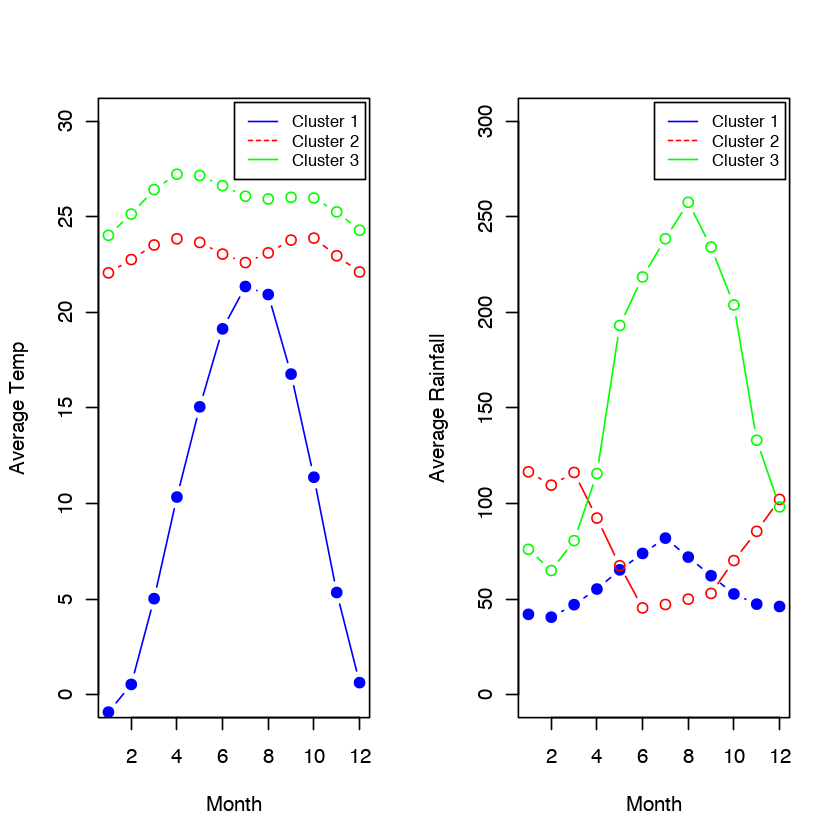

In [500]:
# Trend over Time plot for cluster monthly temperatures and rainfall
par(mfrow=c(1,2))

plot(1:12,cluster_centres[1,1:12],type='b',col='blue',pch=19,ylim=c(0,30),xlab='Month',ylab='Average Temp')
lines(1:12,cluster_centres[2,1:12],type='b',col='red')
lines(1:12,cluster_centres[3,1:12],type='b',col='green')
legend(6.5,31,legend = c("Cluster 1", "Cluster 2","Cluster 3"),col=c('blue','red','green'),lty=1:2, cex=0.8)

plot(1:12,cluster_centres[1,13:24],type='b',col='blue',pch=19,ylim=c(0,300),xlab='Month',ylab='Average Rainfall')
lines(1:12,cluster_centres[2,13:24],type='b',col='red')
lines(1:12,cluster_centres[3,13:24],type='b',col='green')
legend(6.5,310,legend = c("Cluster 1", "Cluster 2","Cluster 3"),col=c('blue','red','green'),lty=1:2, cex=0.8)


In [532]:
km.res$cluster[km.res$cluster==2]

Algeria                          Angola 
                              2                               2 
                      Argentina                       Australia 
                              2                               2 
Bolivia, Plurinational State of                          Brazil 
                              2                               2 
                        Burundi                            Chad 
                              2                               2 
                        Comoros                           Congo 
                              2                               2 
                        Ecuador                           Egypt 
                              2                               2 
                       Ethiopia                            Fiji 
                              2                               2 
                          Gabon                            Iraq 
                              2                               2 
                          Kenya                      Madagascar 
                              2                               2 
                         Malawi                            Mali 
                              2                               2 
                     Mauritania                       Mauritius 
                              2                               2 
                         Mexico                      Mozambique 
                              2                               2 
                          Niger                        Pakistan 
                              2                               2 
                       Paraguay                            Peru 
                              2                               2 
                         Rwanda                         Somalia 
                              2                               2 
                   South Africa                           Sudan 
                              2                               2 
                      Swaziland    Tanzania, United Republic of 
                              2                               2 
                         Uganda                         Uruguay 
                              2                               2 
                         Zambia 
                              2

# Cluster Analysis: Conclusion

Here are my interpretations for each cluster above:

Cluster 1: Very cold winters with constant low rainfall (27 countries - France, Italy, Russia, US, China, Korea, Japan)

Cluster 2: Warm all year round with good winter rainfall (37 countries - Algeria, Brazil, Argentina, Mexico, Uganda)

Cluster 3: Hot all year round and with very heavy summer rainfall (41 countries - Bangladesh, Cambodia, India, Thailand, Vietnam)

NOTE: More work may needed to be done here. For example, countries in the southern hemisphere have their seasons inverted i.e. Summer weather is in December! It may therefore be more appropriate to switch their monthly data columns around so that everything is aligned?

# Rice Yield Cluster Analysis

Let us examine the rice yield in each cluster to see if there is any differences

In [522]:
# Create a simple dataframe with yields and append cluster assignment id
df_annual_yield = df[c('COUNTRY','YIELD')]
df_annual_yield$cluster_id = NA

for (i in 1:3)
 {
  countries_in_cluster = names(km.res$cluster[km.res$cluster==i])
  df_annual_yield$cluster_id[df_annual_yield$COUNTRY %in% countries_in_cluster] = i 
 }


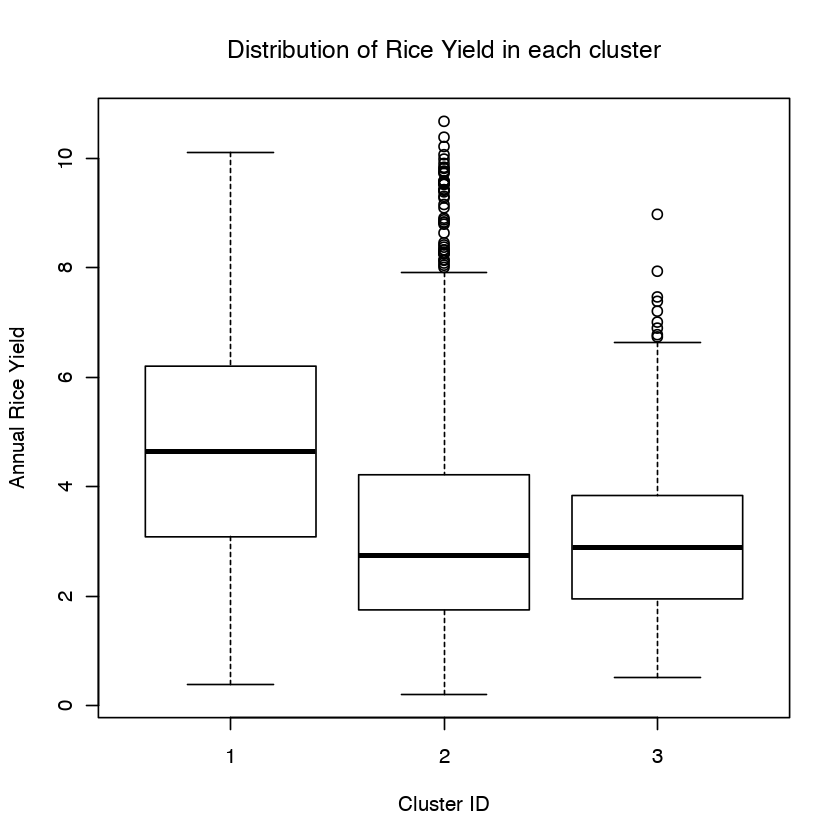

In [524]:
# Simple boxplot of yield values in each cluster
boxplot(df_annual_yield$YIELD ~ df_annual_yield$cluster_id,xlab='Cluster ID',ylab='Annual Rice Yield',main='Distribution of Rice Yield in each cluster')


Surprisingly, the cluster with the highest median rice yield is cluster 1 i.e. Very cold winters with constant low rainfall! It looks like these are developed countries that are very efficient ... but produce little volume.

# Weather Effects on Rice Yield

Let us leave the clustering behind for now and focus on our main objective. That is, attempting to answer the question:

Does the weather affect the rice yield?

Here we detrend the rice yield to remove any long term systematic changes and attempt to build a model which predicts the detrended rice yield using rescaled weather data. 

Specifically, we calculate:

1. Detrended Rice Yield = Y / sd(Y) where Y = Rice Yield - SMA(Rice Yield)
2. Rescaled Weather Data = ( X_i - mean(X_i) )/sd(X_i)


In [525]:
# Create new data frame 
df_detrended = df

# Columns to detrend
column_names = c('YIELD','AVG_TEMP_JAN','AVG_TEMP_FEB','AVG_TEMP_MAR','AVG_TEMP_APR','AVG_TEMP_MAY','AVG_TEMP_JUN','AVG_TEMP_JUL','AVG_TEMP_AUG','AVG_TEMP_SEP','AVG_TEMP_OCT','AVG_TEMP_NOV','AVG_TEMP_DEC','AVG_RF_JAN','AVG_RF_FEB','AVG_RF_MAR','AVG_RF_APR','AVG_RF_MAY','AVG_RF_JUN','AVG_RF_JUL','AVG_RF_AUG','AVG_RF_SEP','AVG_RF_OCT','AVG_RF_NOV','AVG_RF_DEC')

# Add detrended columns
for (col_name in column_names)
 {
  detrended_col_name = paste(col_name,'_SMA',sep="")
  df_detrended = get_sma_for_column(df_detrended,newColName=detrended_col_name,colName=col_name,n=5)
}

# Calculate deviations from SMA values
for (col_name in column_names)
 {
  sma_col_name = paste(col_name,'_SMA',sep="")
  deviation_col_name = paste(col_name,'_DEV',sep="")
  df_detrended[deviation_col_name]  = df_detrended[col_name] - df_detrended[sma_col_name]
}

# Add new empty columns to data frame
for (col_name in column_names)
 {
  mean_deviation_col_name = paste(col_name,'_DEV_MEAN',sep="")
  sd_deviation_col_name = paste(col_name,'_DEV_SD',sep="")
  z_deviation_col_name = paste(col_name,'_Z',sep="")
    
  df_detrended[mean_deviation_col_name] = NA
  df_detrended[sd_deviation_col_name] = NA
  df_detrended[z_deviation_col_name] = NA
 }


# Obtain and record mean and standard deviation of deviations for each country
for (country in unique(df_detrended$COUNTRY))
 {
  df_country = subset(df_detrended,COUNTRY==country)
    
  for (col_name in column_names)
   {
    deviation_col_name = paste(col_name,'_DEV',sep="")
    mean_deviation_col_name = paste(col_name,'_DEV_MEAN',sep="")
    sd_deviation_col_name = paste(col_name,'_DEV_SD',sep="")
    
    mean_value = mean(df_country[,deviation_col_name],na.rm=T)
    sd_value = sd(df_country[,deviation_col_name],na.rm=T)
      
    df_detrended[,mean_deviation_col_name][df_detrended$COUNTRY==country] = mean_value
    df_detrended[,sd_deviation_col_name][df_detrended$COUNTRY==country] = sd_value 
   }  
 }
    

# Rescale deviations to get effective Z-Scores for yield and weather data
for (col_name in column_names)
 {
  deviation_col_name = paste(col_name,'_DEV',sep="")
  mean_deviation_col_name = paste(col_name,'_DEV_MEAN',sep="")
  sd_deviation_col_name = paste(col_name,'_DEV_SD',sep="")
  z_deviation_col_name = paste(col_name,'_Z',sep="")
    
  df_detrended[,z_deviation_col_name] = ( df_detrended[,deviation_col_name] - df_detrended[,mean_deviation_col_name] ) / df_detrended[,sd_deviation_col_name]
 }




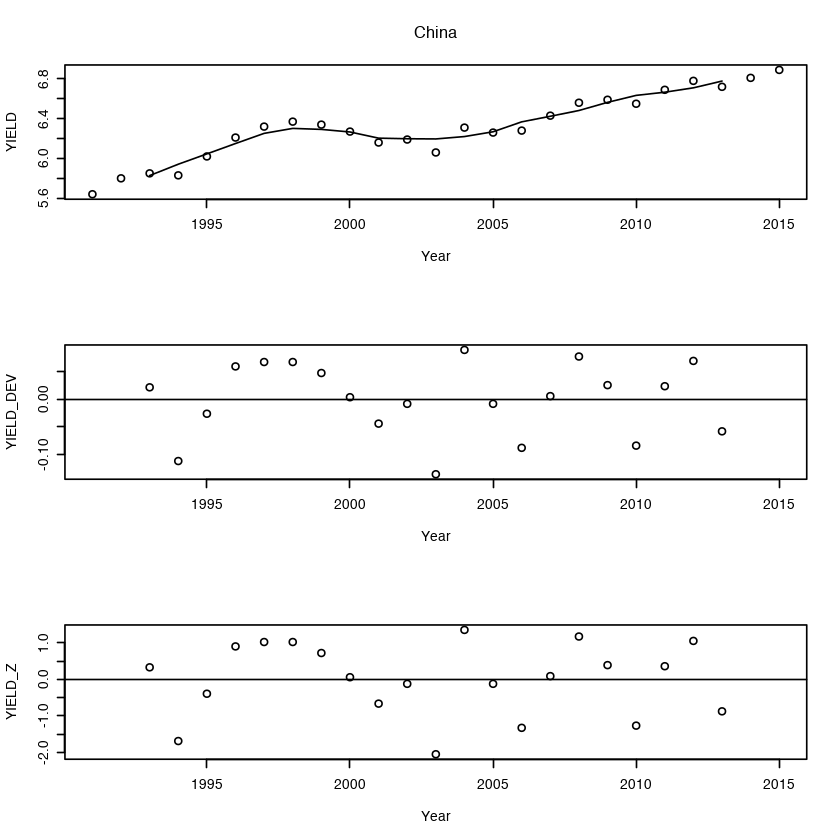

In [533]:
# We plot a few things below
# 1. Raw field value with its Simple Moving Average 
# 2. Deviation of field value from SMA
# 3. Rescaled deviation value

country = 'China'
col_name = 'YIELD'
sma_col_name = paste(col_name,'_SMA',sep="")
deviation_col_name = paste(col_name,'_DEV',sep="")
z_deviation_col_name = paste(col_name,'_Z',sep="")

df_country = subset(df_detrended,COUNTRY==country)

par(mfrow=c(3,1))
plot(df_country$YEAR,df_country[,col_name],xlab='Year',ylab=col_name,main=country)
lines(df_country$YEAR,df_country[,sma_col_name])
plot(df_country$YEAR,df_country[,deviation_col_name],xlab='Year',ylab=deviation_col_name)
abline(h=0)
plot(df_country$YEAR,df_country[,z_deviation_col_name],xlab='Year',ylab=z_deviation_col_name)
abline(h=0)

# Multiple Linear Regression Model 

We attempt to build regression models that predict the average annual yield based on solely the monthly weather data.

We begin with building a model using ALL the 105 countries in our data set. Later we will build models on each of our individual clusters.

# All Countries

In [529]:
model = lm(YIELD_Z ~ AVG_TEMP_JAN_Z+AVG_TEMP_FEB_Z+AVG_TEMP_MAR_Z+AVG_TEMP_APR_Z+AVG_TEMP_MAY_Z+AVG_TEMP_JUN_Z+AVG_TEMP_JUL_Z+AVG_TEMP_AUG_Z+AVG_TEMP_SEP_Z+AVG_TEMP_OCT_Z+AVG_TEMP_NOV_Z+AVG_TEMP_DEC_Z+AVG_RF_JAN_Z+AVG_RF_FEB_Z+AVG_RF_MAR_Z+AVG_RF_APR_Z+AVG_RF_MAY_Z+AVG_RF_JUN_Z+AVG_RF_JUL_Z+AVG_RF_AUG_Z+AVG_RF_SEP_Z+AVG_RF_OCT_Z+AVG_RF_NOV_Z+AVG_RF_DEC_Z, data=df_detrended)
summary(model)



Call:
lm(formula = YIELD_Z ~ AVG_TEMP_JAN_Z + AVG_TEMP_FEB_Z + AVG_TEMP_MAR_Z + 
    AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_JUN_Z + AVG_TEMP_JUL_Z + 
    AVG_TEMP_AUG_Z + AVG_TEMP_SEP_Z + AVG_TEMP_OCT_Z + AVG_TEMP_NOV_Z + 
    AVG_TEMP_DEC_Z + AVG_RF_JAN_Z + AVG_RF_FEB_Z + AVG_RF_MAR_Z + 
    AVG_RF_APR_Z + AVG_RF_MAY_Z + AVG_RF_JUN_Z + AVG_RF_JUL_Z + 
    AVG_RF_AUG_Z + AVG_RF_SEP_Z + AVG_RF_OCT_Z + AVG_RF_NOV_Z + 
    AVG_RF_DEC_Z, data = df_detrended)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0956 -0.5577  0.0519  0.5810  3.5350 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)     1.725e-18  2.085e-02   0.000  1.00000   
AVG_TEMP_JAN_Z  1.514e-02  2.425e-02   0.624  0.53242   
AVG_TEMP_FEB_Z -1.580e-02  2.634e-02  -0.600  0.54882   
AVG_TEMP_MAR_Z -1.528e-02  2.629e-02  -0.581  0.56101   
AVG_TEMP_APR_Z  7.767e-02  2.708e-02   2.868  0.00416 **
AVG_TEMP_MAY_Z -5.154e-02  2.657e-02  -1.940  0.05256 . 
AVG_TEMP_JUN_Z -9.647e-03  2

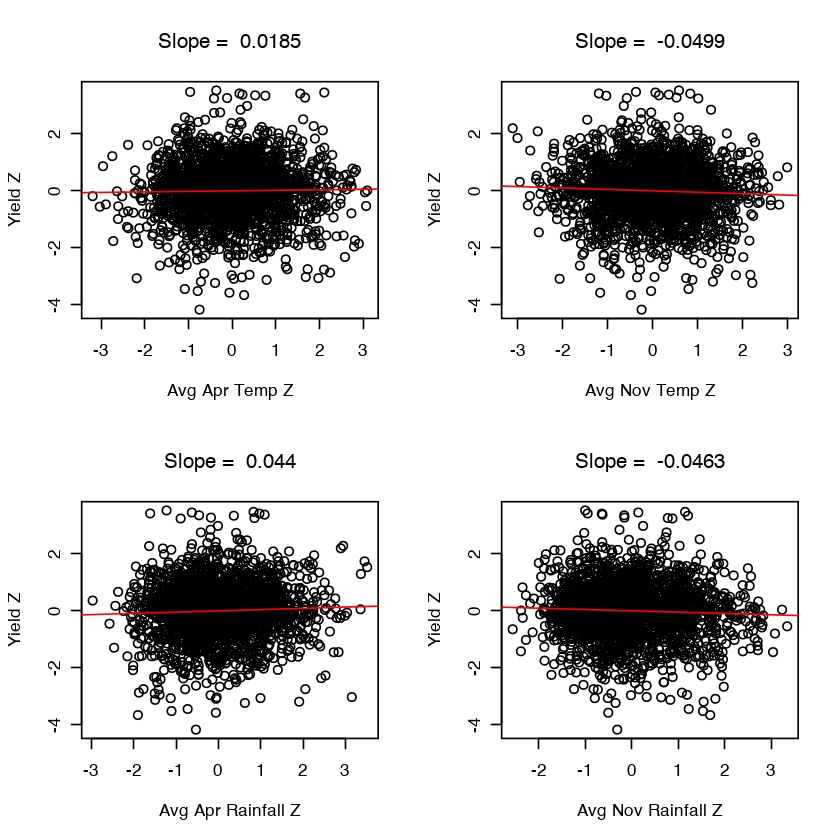

In [530]:
par(mfrow=c(2,2))

model = lm(YIELD_Z ~ AVG_TEMP_APR_Z, data=df_detrended)
intercept = model$coefficients[1]
slope = model$coefficients[2]
plot(df_detrended$AVG_TEMP_APR_Z,df_detrended$YIELD_Z,xlab='Avg Apr Temp Z',ylab='Yield Z',main=paste('Slope = ',round(slope,4)) )
abline(intercept,slope,col='red')

model = lm(YIELD_Z ~ AVG_TEMP_NOV_Z, data=df_detrended)
intercept = model$coefficients[1]
slope = model$coefficients[2]
plot(df_detrended$AVG_TEMP_NOV_Z,df_detrended$YIELD_Z,xlab='Avg Nov Temp Z',ylab='Yield Z',main=paste('Slope = ',round(slope,4)) )
abline(intercept,slope,col='red')

model = lm(YIELD_Z ~ AVG_RF_APR_Z, data=df_detrended)
intercept = model$coefficients[1]
slope = model$coefficients[2]
plot(df_detrended$AVG_RF_APR_Z,df_detrended$YIELD_Z,xlab='Avg Apr Rainfall Z',ylab='Yield Z',main=paste('Slope = ',round(slope,4)) )
abline(intercept,slope,col='red')

model = lm(YIELD_Z ~ AVG_RF_NOV_Z, data=df_detrended)
intercept = model$coefficients[1]
slope = model$coefficients[2]
plot(df_detrended$AVG_RF_NOV_Z,df_detrended$YIELD_Z,xlab='Avg Nov Rainfall Z',ylab='Yield Z',main=paste('Slope = ',round(slope,4)) )
abline(intercept,slope,col='red')
     

In [535]:
# Append and populate the cluster ID column 
df_detrended$CLUSTER_ID = NA

for (i in 1:3)
 {
  countries_in_cluster = names(km.res$cluster[km.res$cluster==i])
  df_detrended$CLUSTER_ID[df_detrended$COUNTRY %in% countries_in_cluster] = i 
 }

In [543]:
# Create data set for each cluster
df_cluster1 = subset(df_detrended,CLUSTER_ID==1)
df_cluster2 = subset(df_detrended,CLUSTER_ID==2)
df_cluster3 = subset(df_detrended,CLUSTER_ID==3)

# Cluster 1: Cold winters with constant low rainfall

In [544]:
model = lm(YIELD_Z ~ AVG_TEMP_JAN_Z+AVG_TEMP_FEB_Z+AVG_TEMP_MAR_Z+AVG_TEMP_APR_Z+AVG_TEMP_MAY_Z+AVG_TEMP_JUN_Z+AVG_TEMP_JUL_Z+AVG_TEMP_AUG_Z+AVG_TEMP_SEP_Z+AVG_TEMP_OCT_Z+AVG_TEMP_NOV_Z+AVG_TEMP_DEC_Z+AVG_RF_JAN_Z+AVG_RF_FEB_Z+AVG_RF_MAR_Z+AVG_RF_APR_Z+AVG_RF_MAY_Z+AVG_RF_JUN_Z+AVG_RF_JUL_Z+AVG_RF_AUG_Z+AVG_RF_SEP_Z+AVG_RF_OCT_Z+AVG_RF_NOV_Z+AVG_RF_DEC_Z, data=df_cluster1)
summary(model)


Call:
lm(formula = YIELD_Z ~ AVG_TEMP_JAN_Z + AVG_TEMP_FEB_Z + AVG_TEMP_MAR_Z + 
    AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_JUN_Z + AVG_TEMP_JUL_Z + 
    AVG_TEMP_AUG_Z + AVG_TEMP_SEP_Z + AVG_TEMP_OCT_Z + AVG_TEMP_NOV_Z + 
    AVG_TEMP_DEC_Z + AVG_RF_JAN_Z + AVG_RF_FEB_Z + AVG_RF_MAR_Z + 
    AVG_RF_APR_Z + AVG_RF_MAY_Z + AVG_RF_JUN_Z + AVG_RF_JUL_Z + 
    AVG_RF_AUG_Z + AVG_RF_SEP_Z + AVG_RF_OCT_Z + AVG_RF_NOV_Z + 
    AVG_RF_DEC_Z, data = df_cluster1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4437 -0.6324  0.0265  0.6843  3.6183 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)     3.909e-17  4.106e-02   0.000   1.0000  
AVG_TEMP_JAN_Z  6.344e-03  4.841e-02   0.131   0.8958  
AVG_TEMP_FEB_Z -2.502e-02  5.034e-02  -0.497   0.6194  
AVG_TEMP_MAR_Z  2.318e-02  4.847e-02   0.478   0.6327  
AVG_TEMP_APR_Z  5.448e-03  4.770e-02   0.114   0.9091  
AVG_TEMP_MAY_Z -3.291e-02  5.441e-02  -0.605   0.5456  
AVG_TEMP_JUN_Z  4.007e-02  5.171e-02

# Cluster 2: Warm all year round with good winter rainfall 

In [545]:
model = lm(YIELD_Z ~ AVG_TEMP_JAN_Z+AVG_TEMP_FEB_Z+AVG_TEMP_MAR_Z+AVG_TEMP_APR_Z+AVG_TEMP_MAY_Z+AVG_TEMP_JUN_Z+AVG_TEMP_JUL_Z+AVG_TEMP_AUG_Z+AVG_TEMP_SEP_Z+AVG_TEMP_OCT_Z+AVG_TEMP_NOV_Z+AVG_TEMP_DEC_Z+AVG_RF_JAN_Z+AVG_RF_FEB_Z+AVG_RF_MAR_Z+AVG_RF_APR_Z+AVG_RF_MAY_Z+AVG_RF_JUN_Z+AVG_RF_JUL_Z+AVG_RF_AUG_Z+AVG_RF_SEP_Z+AVG_RF_OCT_Z+AVG_RF_NOV_Z+AVG_RF_DEC_Z, data=df_cluster2)
summary(model)


Call:
lm(formula = YIELD_Z ~ AVG_TEMP_JAN_Z + AVG_TEMP_FEB_Z + AVG_TEMP_MAR_Z + 
    AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_JUN_Z + AVG_TEMP_JUL_Z + 
    AVG_TEMP_AUG_Z + AVG_TEMP_SEP_Z + AVG_TEMP_OCT_Z + AVG_TEMP_NOV_Z + 
    AVG_TEMP_DEC_Z + AVG_RF_JAN_Z + AVG_RF_FEB_Z + AVG_RF_MAR_Z + 
    AVG_RF_APR_Z + AVG_RF_MAY_Z + AVG_RF_JUN_Z + AVG_RF_JUL_Z + 
    AVG_RF_AUG_Z + AVG_RF_SEP_Z + AVG_RF_OCT_Z + AVG_RF_NOV_Z + 
    AVG_RF_DEC_Z, data = df_cluster2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1545 -0.4654  0.0772  0.5318  3.5978 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)     8.092e-17  3.509e-02   0.000  1.00000   
AVG_TEMP_JAN_Z  2.410e-02  4.201e-02   0.574  0.56639   
AVG_TEMP_FEB_Z  3.693e-03  4.474e-02   0.083  0.93423   
AVG_TEMP_MAR_Z -5.611e-02  4.431e-02  -1.266  0.20579   
AVG_TEMP_APR_Z  9.273e-02  4.438e-02   2.089  0.03701 * 
AVG_TEMP_MAY_Z  2.215e-03  4.237e-02   0.052  0.95833   
AVG_TEMP_JUN_Z -3.795e-03  4.

# Cluster 3: Hot all year round and with very heavy summer rainfall

In [546]:
model = lm(YIELD_Z ~ AVG_TEMP_JAN_Z+AVG_TEMP_FEB_Z+AVG_TEMP_MAR_Z+AVG_TEMP_APR_Z+AVG_TEMP_MAY_Z+AVG_TEMP_JUN_Z+AVG_TEMP_JUL_Z+AVG_TEMP_AUG_Z+AVG_TEMP_SEP_Z+AVG_TEMP_OCT_Z+AVG_TEMP_NOV_Z+AVG_TEMP_DEC_Z+AVG_RF_JAN_Z+AVG_RF_FEB_Z+AVG_RF_MAR_Z+AVG_RF_APR_Z+AVG_RF_MAY_Z+AVG_RF_JUN_Z+AVG_RF_JUL_Z+AVG_RF_AUG_Z+AVG_RF_SEP_Z+AVG_RF_OCT_Z+AVG_RF_NOV_Z+AVG_RF_DEC_Z, data=df_cluster3)
summary(model)


Call:
lm(formula = YIELD_Z ~ AVG_TEMP_JAN_Z + AVG_TEMP_FEB_Z + AVG_TEMP_MAR_Z + 
    AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_JUN_Z + AVG_TEMP_JUL_Z + 
    AVG_TEMP_AUG_Z + AVG_TEMP_SEP_Z + AVG_TEMP_OCT_Z + AVG_TEMP_NOV_Z + 
    AVG_TEMP_DEC_Z + AVG_RF_JAN_Z + AVG_RF_FEB_Z + AVG_RF_MAR_Z + 
    AVG_RF_APR_Z + AVG_RF_MAY_Z + AVG_RF_JUN_Z + AVG_RF_JUL_Z + 
    AVG_RF_AUG_Z + AVG_RF_SEP_Z + AVG_RF_OCT_Z + AVG_RF_NOV_Z + 
    AVG_RF_DEC_Z, data = df_cluster3)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4408 -0.5961 -0.0018  0.5541  3.2162 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)     2.069e-17  3.314e-02   0.000  1.00000   
AVG_TEMP_JAN_Z  4.531e-03  4.059e-02   0.112  0.91115   
AVG_TEMP_FEB_Z  3.495e-03  4.924e-02   0.071  0.94343   
AVG_TEMP_MAR_Z -7.867e-02  5.149e-02  -1.528  0.12693   
AVG_TEMP_APR_Z  1.561e-01  5.468e-02   2.854  0.00443 **
AVG_TEMP_MAY_Z -8.918e-02  5.259e-02  -1.696  0.09033 . 
AVG_TEMP_JUN_Z -6.206e-02  5.

In [26]:
df3 = read.csv("./Data/WRS Data/WRS_paddy_production.csv",header=T)

# Keep FAO source values only
df4 = subset(df3,Source=="FAO")

# Keep only columns needed
df4 = df4[,c('Country','Year','Value')]

# Remove 2016 data
df4 = df4[df4$Year!=2016,]

# Rename some country names 
df4$Country==

In [34]:
productionCountries = unique(tolower(df4$Country))
for (country in unique(tolower(df$COUNTRY)))
    {
     if (!(country %in% productionCountries))
         {
         print(country)
     }
}

[1] "bolivia, plurinational state of"
[1] "brunei darussalam"
[1] "côte d'ivoire"
[1] "congo"
[1] "iran, islamic republic of"
[1] "korea, republic of"
[1] "lao people's democratic republic"
[1] "macedonia, the former yugoslav republic of"
[1] "russian federation"
[1] "tanzania, united republic of"
[1] "united states"
[1] "venezuela, bolivarian republic of"
[1] "viet nam"


In [35]:
unique(tolower(df4$Country))

[1] "afghanistan"              "albania"                 
  [3] "algeria"                  "angola"                  
  [5] "argentina"                "australia"               
  [7] "azerbaijan"               "bangladesh"              
  [9] "belize"                   "benin"                   
 [11] "bhutan"                   "bolivia"                 
 [13] "brazil"                   "brunei"                  
 [15] "bulgaria"                 "burkina faso"            
 [17] "burundi"                  "cambodia"                
 [19] "cameroon"                 "central african republic"
 [21] "chad"                     "chile"                   
 [23] "china"                    "colombia"                
 [25] "comoros"                  "congo (brazzaville)"     
 [27] "congo dr"                 "costa rica"              
 [29] "cuba"                     "dominican republic"      
 [31] "ecuador"                  "egypt"                   
 [33] "el salvador"              "ethiopia"                
 [35] "fiji"                     "france"                  
 [37] "french guiana"            "gabon"                   
 [39] "gambia"                   "ghana"                   
 [41] "greece"                   "guatemala"               
 [43] "guinea"                   "guinea-bissau"           
 [45] "guyana"                   "haiti"                   
 [47] "honduras"                 "hungary"                 
 [49] "india"                    "indonesia"               
 [51] "iran"                     "iraq"                    
 [53] "italy"                    "ivory coast"             
 [55] "jamaica"                  "japan"                   
 [57] "kazakhstan"               "kenya"                   
 [59] "kyrgyzstan"               "laos"                    
 [61] "liberia"                  "macedonia"               
 [63] "madagascar"               "malawi"                  
 [65] "malaysia"                 "mali"                    
 [67] "mauritania"               "mauritius"               
 [69] "mexico"                   "micronesia"              
 [71] "morocco"                  "mozambique"              
 [73] "myanmar"                  "nepal"                   
 [75] "nicaragua"                "niger"                   
 [77] "nigeria"                  "north korea"             
 [79] "pakistan"                 "panama"                  
 [81] "papua new guinea"         "paraguay"                
 [83] "peru"                     "philippines"             
 [85] "portugal"                 "puerto rico"             
 [87] "reunion"                  "romania"                 
 [89] "russia"                   "rwanda"                  
 [91] "senegal"                  "sierra leone"            
 [93] "solomon islands"          "somalia"                 
 [95] "south africa"             "south korea"             
 [97] "spain"                    "sri lanka"               
 [99] "sudan"                    "suriname"                
[101] "swaziland"                "syria"                   
[103] "taiwan"                   "tajikistan"              
[105] "tanzania"                 "thailand"                
[107] "timor-leste"              "togo"                    
[109] "trinidad and tobago"      "turkey"                  
[111] "turkmenistan"             "uganda"                  
[113] "ukraine"                  "united states of america"
[115] "uruguay"                  "ussr"                    
[117] "uzbekistan"               "venezuela"               
[119] "vietnam"                  "yugoslav sfr"            
[121] "zambia"                   "zimbabwe"

In [27]:
df5

,Country,Year,Value
2,AFGHANISTAN,2015,410000
3,AFGHANISTAN,2014,537000
4,AFGHANISTAN,2013,512094
5,AFGHANISTAN,2012,500000
6,AFGHANISTAN,2011,672000
7,AFGHANISTAN,2010,672000
8,AFGHANISTAN,2009,645000
9,AFGHANISTAN,2008,612000
10,AFGHANISTAN,2007,552000
11,AFGHANISTAN,2006,540000


ISO,YEAR,COUNTRY,LAND_AREA,HARV_AREA,FERT,YIELD,AVG_TEMP_JAN,AVG_TEMP_FEB,AVG_TEMP_MAR,⋯,AVG_RF_NOV,AVG_RF_DEC,AVG_Q1_TEMP,AVG_Q2_TEMP,AVG_Q3_TEMP,AVG_Q4_TEMP,AVG_Q4_RF,AVG_Q3_RF,AVG_Q2_RF,AVG_Q1_RF
AFG,1991,Afghanistan,65286,173000,6.140000,1.94,-0.03110,1.43654,6.88685,⋯,12.66710,38.55690,2.764097,17.69763,22.97277,8.143453,18.439893,7.230680,38.211393,81.26800
AFG,1992,Afghanistan,65286,175000,5.790000,1.71,0.74637,2.46018,5.71341,⋯,9.92092,47.46040,2.973320,16.89697,21.80963,8.498270,24.419740,7.827567,44.342037,59.46273
AFG,1993,Afghanistan,65286,175000,5.110000,1.71,-0.08350,4.33465,6.12034,⋯,21.58090,20.68180,3.457163,18.33557,22.52880,7.587023,16.628000,5.226967,29.860033,53.98010
AFG,1994,Afghanistan,65286,180000,5.820435,1.90,1.11415,1.14112,8.97734,⋯,12.81990,36.94000,3.744203,18.18197,22.22033,8.173570,23.602467,11.033253,23.070173,56.36823
AFG,1995,Afghanistan,65286,170000,5.820435,2.29,0.92358,2.96133,6.36893,⋯,6.24458,35.71700,3.417947,17.96013,23.05943,7.726067,18.517060,7.733073,31.694750,42.35450
AFG,1996,Afghanistan,65286,175000,0.650000,1.94,-0.48840,2.86922,7.29518,⋯,9.68384,6.71934,3.225333,17.79007,22.77710,7.208570,10.373927,5.784513,27.519300,63.32300
AFG,1997,Afghanistan,65286,180000,0.650000,2.22,1.08346,2.14471,6.98142,⋯,15.77760,33.62270,3.403197,17.42607,23.24533,7.397023,24.580900,6.141290,38.877100,40.81997
AFG,1998,Afghanistan,65286,180000,0.900000,2.50,0.37702,1.63968,7.01120,⋯,3.35615,5.12023,3.009300,18.60967,23.24870,8.892063,4.844903,6.175183,39.897067,68.56993
AFG,1999,Afghanistan,65286,140000,0.650000,2.00,0.53312,4.96015,7.70394,⋯,40.05250,4.54192,4.399070,19.20510,23.69687,8.994647,16.005397,8.811747,14.475263,59.12917
AFG,2000,Afghanistan,65286,130000,0.650000,2.00,1.62425,1.92871,7.48463,⋯,16.54230,22.17040,3.679197,20.45507,22.81473,8.146550,20.191167,7.451927,5.228867,34.39877
